# GRADIANT BOOSTING MACHINES

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df = pd.read_csv("verisetleri\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [5]:
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [6]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.4823418271236

# Model Tunning

In [8]:
# criterion='friedman_mse' --> Bölünmelerle ilgili saflık ölçüsünü ifade etmektedir. 
# learning_rate=0.1 --> Ağaçların katkısı ile ilgili göz önünde bulundurulan bir değerdir.
# loss='ls' --> Kayıp fonksiyonudur. Bazen cost olarak ta geçer. 'ls' en küçük kareleri ifade etmektedir. Yani gerçek değerler ile tahmin edilen değerler arasındaki farkın karelerinin toplamının minimum değeridir. Farklı loss fonksiyonları vardır.
# Diğer önemli parametre n_estimators dur.
# subsample=1.0 --> Oluşturlacak olan ağaçları oluştururken göz önünde bulundurulacak olan oranı ifade etmektedir. 1 yazdığımızda hepsini dahil ederek ağaç oluşturuyor.

In [9]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        d:\btkakademi_turkcellgy\.tgy_veribilimi\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
    loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'quantile'
    allows quantile regression (use `alpha` to specify the quantile).

learning_rate : float, default=0.1
    learning rate shrinks the

In [10]:
# loss fonksiyonlarındaki quantile, huber, lad dayanıklı fonksiyonlardır. Yani aykırı artıklara karşı dayanıklı olan fonksiyonlardır. Örneğin gerçek değer 1000, tahmin edilen değer 9000, arada 8000 fark var. Bu artık büyük miktarda sayılabilecek bir artıktır. Bunlara karşı duyarlı olmak ifade edilmektedir. 

# Modelin eğitim süresini kısaltmak için parametreleri azaltabilirsiniz. Bu haliyle yaklaşık 30 dakika sürmektedir. 
gbm_params = {"learning_rate" : [0.001, 0.1, 0.01, 0.5], "max_depth" : [3, 5, 8, 10], "n_estimators": [100, 200, 500, 1000], "subsample" :[1, 0.5, 0.8],
"loss" : ["ls", "lad", "quantile"]}

In [11]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [12]:
gbm_model_cv = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 30.7min finished


In [17]:
gbm_model_cv.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [18]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1 , loss = 'lad' , max_depth = 3 , n_estimators = 100 , subsample = 0.8).fit(X_train, y_train)

In [19]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

330.02803707327126

## Değişkenlerin önem düzeyleri

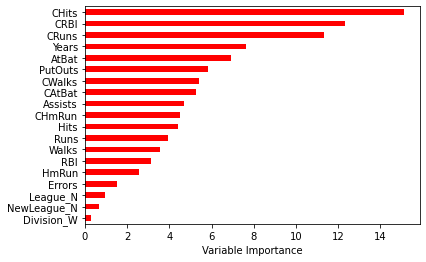

In [20]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by='Importance',axis=0,ascending=True).plot(kind='barh',color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [21]:
# SON